-0.1
-0.0


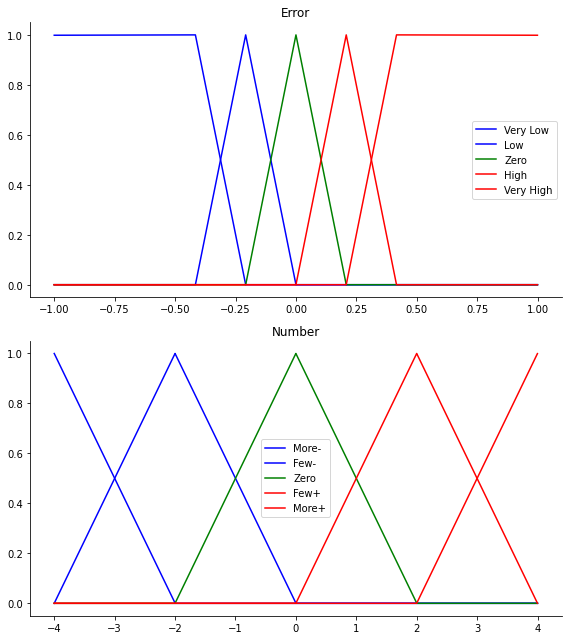

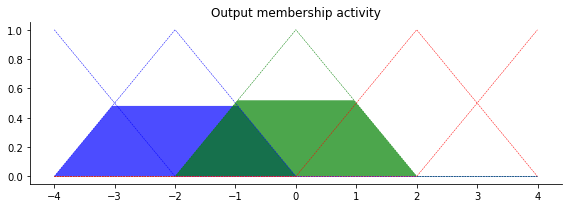

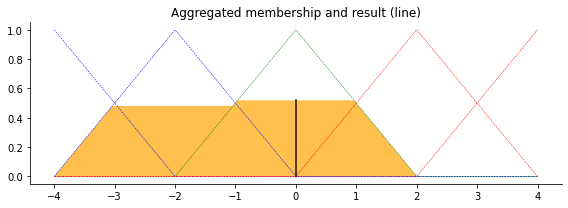

In [29]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

#error = np.arange(-0.625, 0.626, 0.001) #original
#number = np.arange(-4, 5, .001)
error = np.arange(-1, 1, 0.001)
number = np.arange(-4, 4, .001)

error_llo = fuzz.trimf(error, [-0.416*1000, -0.416, -0.208])
error_lo = fuzz.trimf(error, [-0.416, -0.208, 0])
error_md = fuzz.trimf(error, [-0.208, 0, 0.208])
error_hi = fuzz.trimf(error, [0, 0.208, 0.416])
error_hhi = fuzz.trimf(error, [0.208, 0.416, 0.416*1000])

number_llo = fuzz.trimf(number, [-4, -4, -2])
number_lo = fuzz.trimf(number, [-4, -2, 0])
number_md = fuzz.trimf(number, [-2, 0, 2])
number_hi = fuzz.trimf(number, [0, 2, 4])
number_hhi = fuzz.trimf(number, [2, 4, 4])
# Visualize these universes and membership functions
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(8, 9))
ax0.plot(error, error_llo, 'b', linewidth=1.5, label='Very Low')
ax0.plot(error, error_lo, 'b', linewidth=1.5, label='Low')
ax0.plot(error, error_md, 'g', linewidth=1.5, label='Zero')
ax0.plot(error, error_hi, 'r', linewidth=1.5, label='High')
ax0.plot(error, error_hhi, 'r', linewidth=1.5, label='Very High')
ax0.set_title('Error')
ax0.legend()
ax1.plot(number, number_llo, 'b', linewidth=1.5, label='More-')
ax1.plot(number, number_lo, 'b', linewidth=1.5, label='Few-')
ax1.plot(number, number_md, 'g', linewidth=1.5, label='Zero')
ax1.plot(number, number_hi, 'r', linewidth=1.5, label='Few+')
ax1.plot(number, number_hhi, 'r', linewidth=1.5, label='More+')
ax1.set_title('Number')
ax1.legend()
# Turn off top/right axes
for ax in (ax0, ax1):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()

input_error = -0.1

error_level_llo = fuzz.interp_membership(error, error_llo, input_error)
error_level_lo = fuzz.interp_membership(error, error_lo, input_error)
error_level_md = fuzz.interp_membership(error, error_md, input_error)
error_level_hi = fuzz.interp_membership(error, error_hi, input_error)
error_level_hhi = fuzz.interp_membership(error, error_hhi, input_error)

wheel_activation_llo = np.fmin(error_level_llo, number_llo)
wheel_activation_lo = np.fmin(error_level_lo, number_lo)
wheel_activation_md = np.fmin(error_level_md, number_md)
wheel_activation_hi = np.fmin(error_level_hi, number_hi)
wheel_activation_hhi = np.fmin(error_level_hhi, number_hhi)

tip0 = np.zeros_like(number)
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.fill_between(number, tip0, wheel_activation_llo, facecolor='b', alpha=0.7)
ax0.plot(number, number_llo, 'b', linewidth=0.5, linestyle='--', )

ax0.fill_between(number, tip0, wheel_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(number, number_lo, 'b', linewidth=0.5, linestyle='--', )

ax0.fill_between(number, tip0, wheel_activation_md, facecolor='g', alpha=0.7)
ax0.plot(number, number_md, 'g', linewidth=0.5, linestyle='--')

ax0.fill_between(number, tip0, wheel_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(number, number_hi, 'r', linewidth=0.5, linestyle='--')

ax0.fill_between(number, tip0, wheel_activation_hhi, facecolor='r', alpha=0.7)
ax0.plot(number, number_hhi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')
# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()

# # Aggregate all three output membership functions together
#aggregated = np.fmax(wheel_activation_lo, np.fmax(wheel_activation_md, wheel_activation_hi))

aggregated = np.fmax(wheel_activation_llo, np.fmax(wheel_activation_lo, np.fmax(wheel_activation_md,\
             np.fmax(wheel_activation_hi, wheel_activation_hhi))))

print(input_error)
tip = fuzz.defuzz(number, aggregated, 'mom')
print(round(tip))
tip_activation = fuzz.interp_membership(number, aggregated, tip)  # for plot
# # Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.plot(number, number_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(number, number_llo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(number, number_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(number, number_hi, 'r', linewidth=0.5, linestyle='--')
ax0.plot(number, number_hhi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(number, tip0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')
# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()